<a href="https://colab.research.google.com/github/roshank1605A04/Stock-Market-Predictions/blob/master/Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Import numpy, pandas and os
import numpy as np
import pandas as pd
import os

# import matplotlib, seaborn and use sklearn packages
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# importing the keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM
import math


In [3]:
# Load full dataset in dataFrame

In [5]:
df = pd.read_csv('./Tesla.csv')
df

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.000000,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.420000,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.920000,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.100000,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.000000,15.830000,16.110001,6866900,16.110001
...,...,...,...,...,...,...,...
1687,3/13/2017,244.820007,246.850006,242.779999,246.169998,3010700,246.169998
1688,3/14/2017,246.110001,258.119995,246.020004,258.000000,7575500,258.000000
1689,3/15/2017,257.000000,261.000000,254.270004,255.729996,4816600,255.729996
1690,3/16/2017,262.399994,265.750000,259.059998,262.049988,7100400,262.049988


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1692 non-null   object 
 1   Open       1692 non-null   float64
 2   High       1692 non-null   float64
 3   Low        1692 non-null   float64
 4   Close      1692 non-null   float64
 5   Volume     1692 non-null   int64  
 6   Adj Close  1692 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 92.7+ KB


In [7]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)

In [8]:
df.shape # Data Frame size: 1692 rows and 7 columns 

(1692, 6)

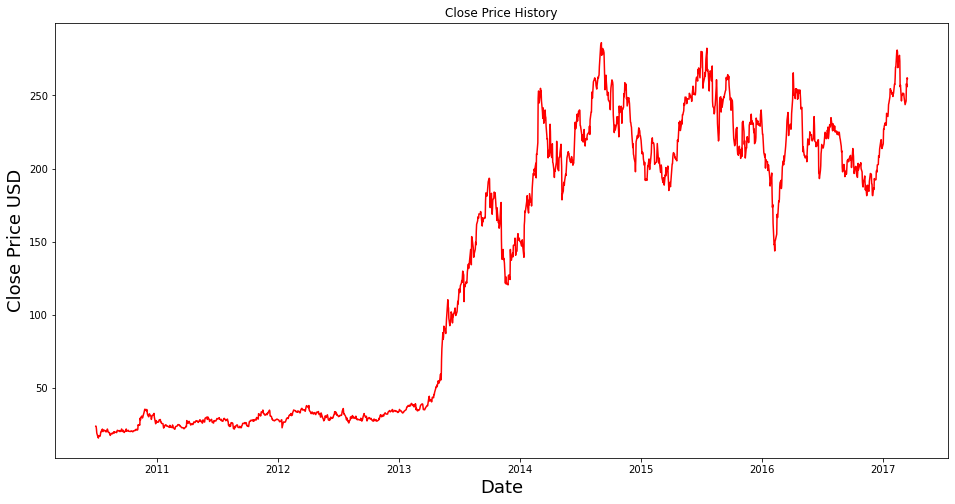

In [9]:
# Plott data
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'], color='red')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD', fontsize = 18)
plt.show()

In [10]:
# create a new data frame with only 'Close column'
data = df.filter(['Close'])
dataset = data.values #convert the data frame to a numpy array
training_data_len = math.ceil(len(dataset)*.8)  # number of rows to train the model on
training_data_len


1354

In [11]:
#scale the data
scaler = MinMaxScaler(feature_range=(-1,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data


array([[-0.9401273 ],
       [-0.94057135],
       [-0.9544109 ],
       ...,
       [ 0.77568079],
       [ 0.82245397],
       [ 0.8183836 ]])

In [12]:
# Create the training dataset
# Create the scaled training dataset
#
train_data = scaled_data[0:training_data_len, :]
#Split the data into x_train, y_train datasets
x_train = []
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i,0])
    if i<=60:
        print(x_train)
        print(y_train)
        print()

[array([-0.9401273 , -0.94057135, -0.9544109 , -0.97483718, -0.99770574,
       -1.        , -0.98771463, -0.98815867, -0.99074897, -0.98268207,
       -0.97010065, -0.96973062, -0.96418   , -0.95478094, -0.96669628,
       -0.96728834, -0.96151569, -0.95936944, -0.96188573, -0.96484607,
       -0.96358793, -0.96632623, -0.96936056, -0.96210776, -0.9544849 ,
       -0.95959148, -0.96558614, -0.97195086, -0.97187685, -0.97609532,
       -0.98445826, -0.98667851, -0.98134991, -0.97794552, -0.97520722,
       -0.97801954, -0.97787151, -0.97557727, -0.96795442, -0.97483718,
       -0.9696566 , -0.97076673, -0.97113676, -0.96987862, -0.97276495,
       -0.96558614, -0.96107165, -0.96114566, -0.96492006, -0.96225577,
       -0.96366194, -0.96765838, -0.96358793, -0.96062758, -0.95426288,
       -0.96195973, -0.96721433, -0.96107165, -0.96321788, -0.96987862])]
[-0.9721728916905121]



In [13]:
# convert the x_train and y_train  to numppy array
x_train,y_train = np.array(x_train), np.array(y_train)

In [14]:
# Reshape the data
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape


(1294, 60, 1)

# LSTM Model

In [15]:
# Build LSTM model
#
model = Sequential()
model.add(LSTM(64,return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64, return_sequences= False))
model.add(Dense(32))
model.add(Dense(1))


In [16]:
# Complie the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [17]:
# Train the model
model.fit(x_train,y_train, batch_size=1, epochs=10)


Epoch 1/10
1294/1294 [==============================] - 30s 21ms/step - loss: 0.0200
Epoch 2/10
1294/1294 [==============================] - 30s 23ms/step - loss: 0.0031
Epoch 3/10
1294/1294 [==============================] - 34s 27ms/step - loss: 0.0025
Epoch 4/10
1294/1294 [==============================] - 36s 27ms/step - loss: 0.0018
Epoch 5/10
1294/1294 [==============================] - 35s 27ms/step - loss: 0.0019
Epoch 6/10
1294/1294 [==============================] - 34s 27ms/step - loss: 0.0017
Epoch 7/10
1294/1294 [==============================] - 35s 27ms/step - loss: 0.0017
Epoch 8/10
1294/1294 [==============================] - 35s 27ms/step - loss: 0.0020
Epoch 9/10
1294/1294 [==============================] - 37s 29ms/step - loss: 0.0015
Epoch 10/10
1294/1294 [==============================] - 35s 27ms/step - loss: 0.0017


In [18]:
# Create the testing data sets
# 
test_data= scaled_data[training_data_len-60:, :]

# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:,:]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])
    

In [22]:
# Convert the data to a numpy array
x_test = np.array(x_test)


In [23]:
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))
x_test.shape


(338, 60, 1)

In [25]:
# Predicting the data
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


In [33]:
# Get the root mean square error(RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse


0.09976715129784602

<ipython-input-42-0dbc283375bf>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actual['Predictions'] = predictions


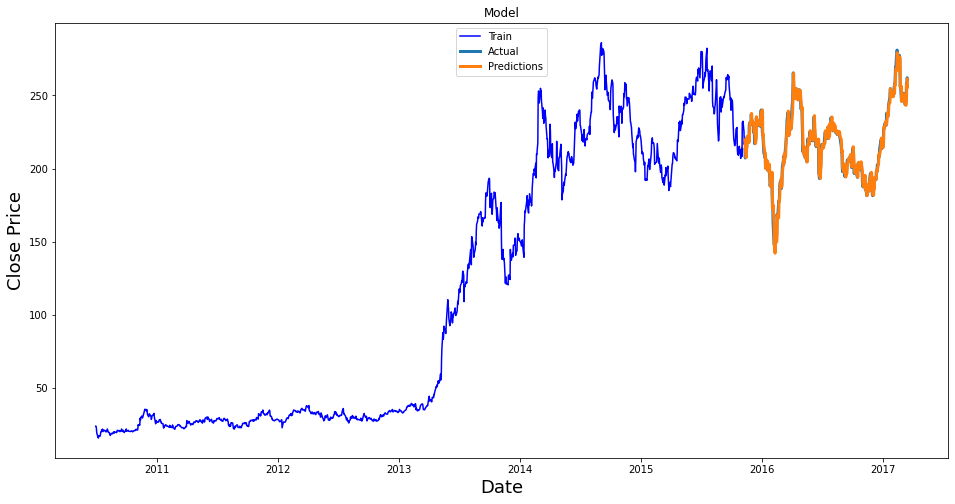

In [42]:
# Plot the data
train = data[:training_data_len]
actual = data[training_data_len:]
actual['Predictions'] = predictions

# Visialization the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price' ,fontsize=18)
plt.plot(train['Close'],linewidth=1.5, color='blue')
plt.plot(actual[['Close','Predictions']],linewidth=3.0)
plt.legend(['Train','Actual','Predictions'], loc='upper center')


In [36]:
# Show the actual and predicted price
actual

,Close,Predictions
Date,,
2015-11-12,212.940002,219.648209
2015-11-13,207.190002,213.479492
2015-11-16,214.309998,207.512436
2015-11-17,214.000000,215.160461
2015-11-18,221.070007,214.699066
...,...,...
2017-03-13,246.169998,243.213074
2017-03-14,258.000000,245.855927
2017-03-15,255.729996,257.822845


In [37]:
#get the quote
tesla_quote = pd.read_csv('./Tesla.csv')
#Create new data frame
new_df = tesla_quote.filter(['Close'])
#get the last 60 days closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
#scaled the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#create an empty list
X_test = []
#append the past 60 days 
X_test.append(last_60_days_scaled)
#convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1],1))
#get the predicted scaled price
pred_price= model.predict(X_test)
#undo the scalling
pred_price = scaler.inverse_transform(pred_price)
pred_price


array([[260.45654]], dtype=float32)